## OneBharat Assignment - 1

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df = pd.read_json('P1- BankStatements.json')
df.head()

,Account
Profile,"{'Holders': {'type': 'SINGLE', 'Holder': {'nam..."
Summary,"{'currentBalance': '761.41', 'currency': 'INR'..."
Transactions,"{'startDate': '2023-05-31', 'endDate': '2024-0..."
linkedAccRef,02f28b8d-d8a3-43d7-88c6-5fabb2e51541
maskedAccNumber,XXXX6461


In [133]:
account_profile_df = pd.json_normalize(df['Account']['Profile']['Holders'])
summary_df = pd.json_normalize(df['Account']['Summary'])
transactions_df = pd.json_normalize(df['Account']['Transactions']['Transaction'])

In [126]:
account_profile_df

,type,Holder.name,Holder.dob,Holder.mobile,Holder.nominee,Holder.address,Holder.email,Holder.pan,Holder.ckycCompliance
0,SINGLE,Arun Shakya,2000-06-09,8429489761,REGISTERED,,NA,FORM60,true


In [127]:
summary_df

,currentBalance,currency,exchgeRate,balanceDateTime,type,branch,ifscCode,micrCode,openingDate,currentODLimit,drawingLimit,status,Pending.amount
0,761.41,INR,1,2024-05-30T03:05:12+05:30,SAVINGS,"AMETHI JADID, UP",BARB0AMEJAD,209012004,2020-11-24,0.00,0.00,ACTIVE,0.0


In [128]:
transactions_df

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29T17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA
981,CREDIT,OTHERS,938.0,961.41,2024-05-30T05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715
982,DEBIT,UPI,60.0,901.41,2024-05-30T09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA
983,DEBIT,UPI,130.0,771.41,2024-05-30T13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA


#### 1. Transaction Analysis:

Q1. What is the total number of transactions made over the year?

In [86]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


Ans1. Total number of transactions made for the given account are 985.

In [87]:
transactions_df.describe()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
count,985,985,985,985,985,985,985,985,985
unique,2,5,206,938,985,276,985,982,3
top,DEBIT,UPI,10.0,1525.80,2023-06-27T09:40:19+05:30,2023-08-25,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
freq,695,789,69,3,1,12,1,4,826


Q2. What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself) 

Box - Plot for amount to identify the range of values in the column

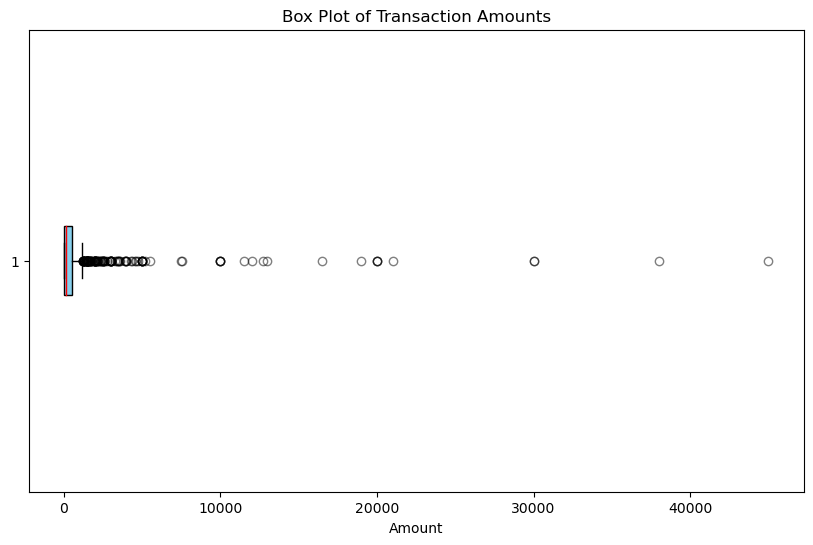

In [66]:
transactions_df['amount'] = pd.to_numeric(transactions_df['amount'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.boxplot(transactions_df['amount'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.5))

plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

Text(0, 0.5, 'Frequency')

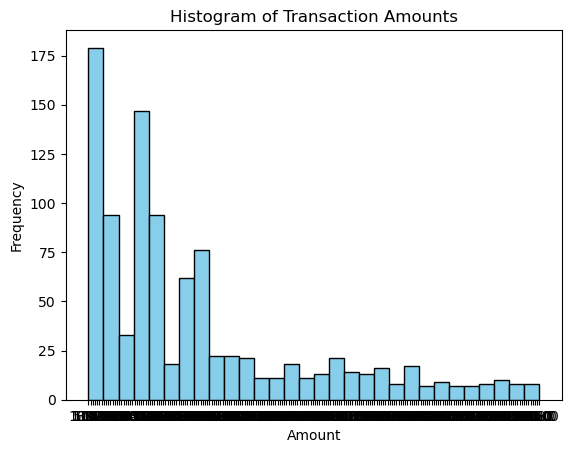

In [88]:
# Histogram
plt.hist(transactions_df['amount'].dropna(), bins=30, color='skyblue',edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

In [129]:
#Descriptive statistics to define small and large transactions

transactions_df['amount']= transactions_df['amount'].astype(str).astype(float)
desc_stats = transactions_df['amount'].describe()
print(desc_stats)

count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64


Here we can say that the small transaction can be defined as amounts below the 25th percentile and large as above the 75th percentile.

In [130]:
# Defining small and large transactions

small_transactions = transactions_df[transactions_df['amount'] <= desc_stats['25%']]
large_transactions = transactions_df[transactions_df['amount'] >= desc_stats['75%']]

print(f"Number of small transactions (<= {desc_stats['25%']}): {small_transactions.shape[0]}")
print(f"Number of large transactions (>= {desc_stats['75%']}): {large_transactions.shape[0]}")

Number of small transactions (<= 40.0): 254
Number of large transactions (>= 500.0): 298


Ans2. Small transactions are the one's which had transaction amount less than Rs.40 and large transaction are those which had transactiona amount greater than Rs. 500.

In [91]:
transactions_df['mode'].unique()

array(['CARD', 'OTHERS', 'ATM', 'UPI', 'CASH'], dtype=object)

In [92]:
transactions_df['type'].unique()

array(['DEBIT', 'CREDIT'], dtype=object)

Q3. Analyze the frequency of different transaction types (debit vs. credit).

DEBIT     695
CREDIT    290
Name: type, dtype: int64


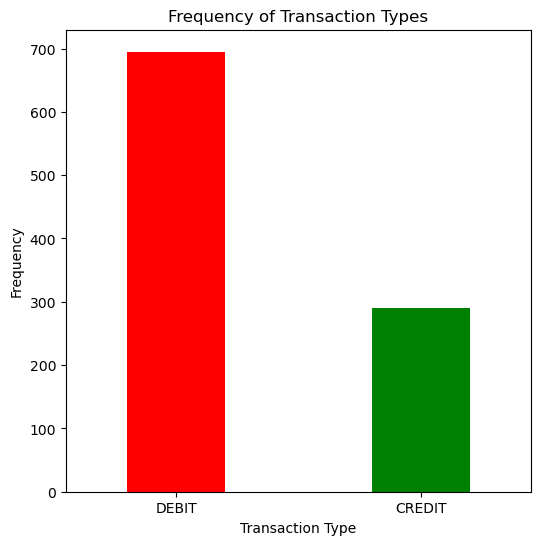

In [93]:
transaction_type_counts = transactions_df['type'].value_counts()

# Display the counts
print(transaction_type_counts)

# Create a bar plot for transaction types
plt.figure(figsize=(6, 6))
transaction_type_counts.plot(kind='bar',width = 0.4,color=['red', 'green'])
plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Ans3. No of transactions debited to the account - 695. No of transactions credited to the account - 290

#### 2. Balance Analysis: 

Q1. What is the trend of the account balance over time?

In [73]:
#transactions_df['date'] = pd.to_datetime(transactions_df['transactionTimestamp']).dt.date
#transactions_df['date']

0      2023-06-27
1      2023-06-28
2      2023-07-26
3      2023-08-06
4      2023-08-07
          ...    
980    2024-05-29
981    2024-05-30
982    2024-05-30
983    2024-05-30
984    2024-05-30
Name: date, Length: 985, dtype: object

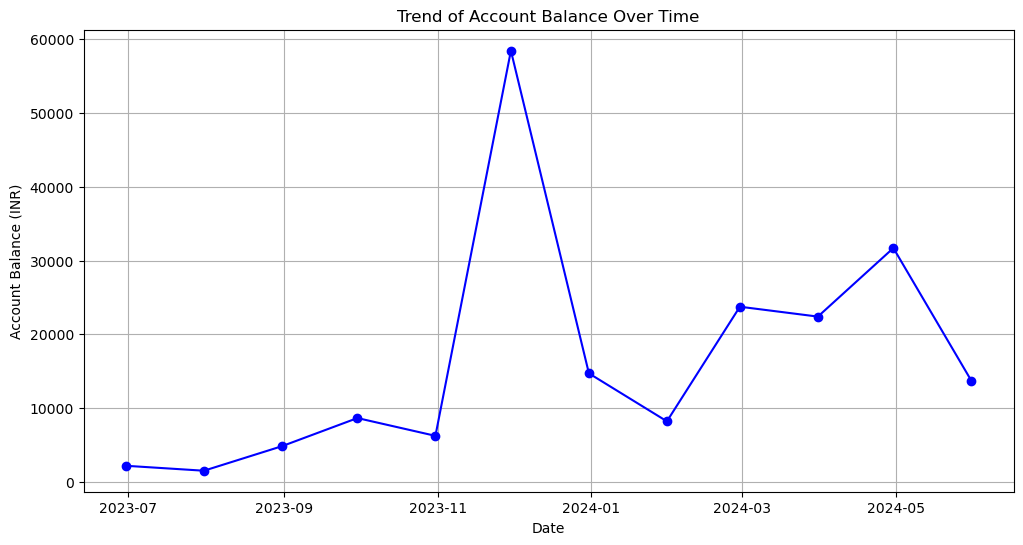

In [134]:
transactions_df['transactionTimestamp'] = pd.to_datetime(transactions_df['transactionTimestamp'])
transactions_df['currentBalance'] = transactions_df['currentBalance'].astype(str).astype(float)
# Setting 'transactionTimestamp' as the index
transactions_df.set_index('transactionTimestamp', inplace=True)

currentBalance = transactions_df['currentBalance'].resample('M').max()

plt.figure(figsize=(12, 6))
plt.plot(currentBalance.index, currentBalance.values,  marker='o', linestyle='-', color='b')
plt.title('Trend of Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance (INR)')
plt.grid(True)
plt.show()


#### Spending Patterns:

Q1. What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?

First we will make a dataframe for only debit transactions which represents our expenses.

In [106]:
# Dataframe for only Debit transactions
debit_transactions_df = transactions_df[transactions_df['type']=='DEBIT']

Now we can see the mode of transactions done for the expenses using groupby function

In [107]:
debit_transactions_df['mode'].unique()

array(['CARD', 'ATM', 'UPI'], dtype=object)

Main category of expenses were found to be UPI, ATM, and CARD transactions.

Q2. Analyze the frequency and amount of spending in each category.

In [108]:
debit_transaction_counts = debit_transactions_df.groupby(['mode']).size().reset_index(name='count')
print(debit_transaction_counts)

   mode  count
0   ATM      3
1  CARD      4
2   UPI    688


Frequency of spending in each category: ATM - 3, CARD - 4, UPI - 688 

In [109]:
debit_transaction_spending = debit_transactions_df.groupby('mode')['amount'].sum().reset_index(name='spent')
print(debit_transaction_spending)

   mode     spent
0   ATM   13500.0
1  CARD     830.0
2   UPI  407759.9


Amount of spending in each category: ATM - Rs. 13,500, CARD - Rs. 830, UPI - Rs. 4,07,759.9

#### Income Analysis: 

Q1. What are the main sources of income (e.g., salary, UPI credits)?

First making a dataframe for CREDIT transactions to check the sources of incomes.

In [110]:
# Dataframe for CREDIT transactions
credit_transactions_df = transactions_df[transactions_df['type']=='CREDIT']

Now let's check the different mode of transactions for type credit

In [111]:
credit_transactions_df['mode'].unique()

array(['OTHERS', 'UPI', 'CASH'], dtype=object)

Sources of Incomes are UPI transactions,cash and others

In [112]:
credit_transaction_cate = credit_transactions_df.groupby('mode')['amount'].sum().reset_index(name='income')
print(credit_transaction_cate)

     mode     income
0    CASH   45000.00
1  OTHERS  196237.51
2     UPI  179333.00


Main sources of income seems to be salary and UPI crdeits.

Q2. Identify any patterns in the timing and amount of income received. 

C:\Users\SHRIMANI TUNDURWAR\AppData\Local\Temp\ipykernel_13952\1235843716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_transactions_df['transactionTimestamp'] = pd.to_datetime(credit_transactions_df['transactionTimestamp'])


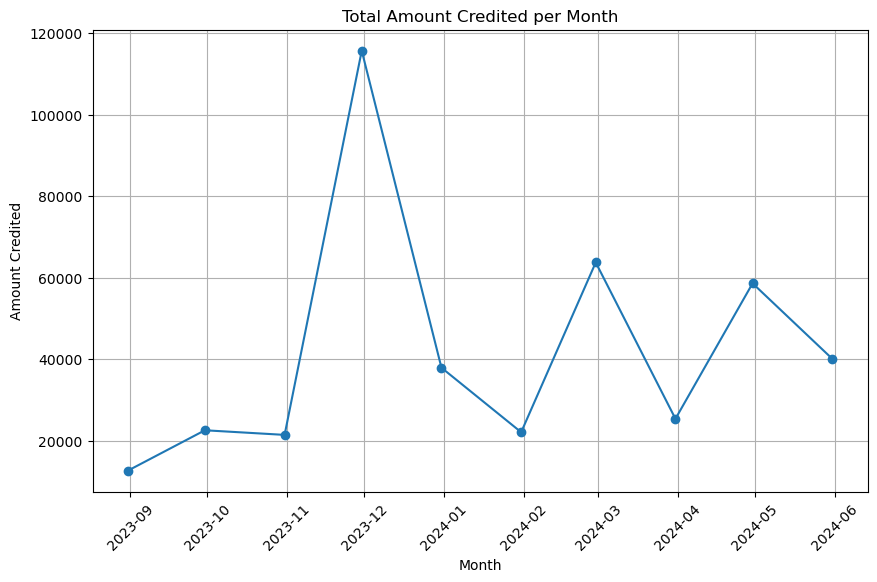

In [113]:
credit_transactions_df['transactionTimestamp'] = pd.to_datetime(credit_transactions_df['transactionTimestamp'])

# Setting 'transactionTimestamp' as the index
credit_transactions_df.set_index('transactionTimestamp', inplace=True)

# Converting the timestamp to month
monthly_credit = credit_transactions_df['amount'].resample('M').sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_credit.index, monthly_credit.values, marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Amount Credited')
plt.title('Total Amount Credited per Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

It seems that the income generated in the month of december was the highest.

#### Alert Generation

Identify any unusual or suspicious transactions.

C:\Users\SHRIMANI TUNDURWAR\AppData\Local\Temp\ipykernel_13952\1203408673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit_transactions_df['transactionTimestamp'] = pd.to_datetime(debit_transactions_df['transactionTimestamp'])


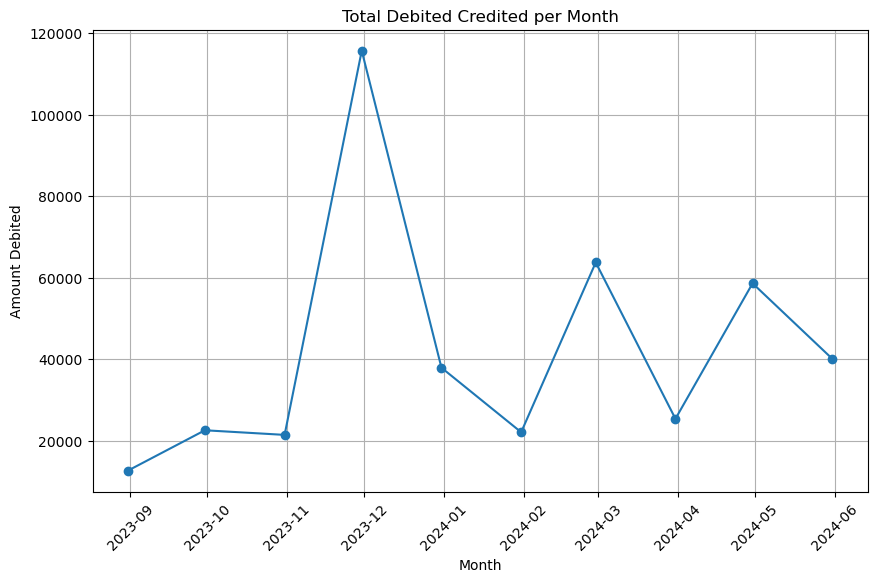

In [144]:
debit_transactions_df['transactionTimestamp'] = pd.to_datetime(debit_transactions_df['transactionTimestamp'])

# Setting 'transactionTimestamp' as the index
debit_transactions_df.set_index('transactionTimestamp', inplace=True)

# Converting the timestamp to month
monthly_debit = debit_transactions_df['amount'].resample('M').sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_credit.index, monthly_credit.values, marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Amount Debited')
plt.title('Total Debited Credited per Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [150]:
transactions_df['amount'] =  transactions_df['amount'].astype(str).astype(float)


# Generate alerts for unusual or suspicious transactions using IQR method
def detect_outliers_iqr(df):
    threshold = 10000
    return df[(df['amount'] > threshold)]

outliers = detect_outliers_iqr(transactions_df)
print("Unusual or Suspicious Transactions:")
print(outliers)

Unusual or Suspicious Transactions:
                             type    mode   amount  currentBalance  \
transactionTimestamp                                                 
2023-11-14 18:31:11+05:30  CREDIT     UPI  37999.0        43892.80   
2023-11-14 18:49:41+05:30   DEBIT     UPI  16500.0        27391.80   
2023-11-16 15:51:14+05:30  CREDIT    CASH  45000.0        58180.80   
2023-11-17 16:34:54+05:30   DEBIT     UPI  21000.0        35400.80   
2023-11-29 16:15:33+05:30   DEBIT     UPI  19000.0        16625.80   
2023-11-29 17:09:47+05:30   DEBIT     UPI  12700.0         3925.80   
2023-12-05 15:50:06+05:30   DEBIT     UPI  13000.0          865.80   
2024-02-24 18:55:15+05:30  CREDIT     UPI  20000.0        23483.91   
2024-02-25 11:08:34+05:30   DEBIT     UPI  20000.0         3683.91   
2024-02-25 20:08:58+05:30  CREDIT     UPI  20000.0        23664.91   
2024-03-20 18:56:48+05:30   DEBIT     UPI  12000.0         1119.11   
2024-04-12 20:47:44+05:30  CREDIT     UPI  30000.0    

Here we have generted a threshold of 10000 INR above which any transaction amount will be considered as unsual or suspicious transactions.

In [154]:
def generate_low_balance_alerts(df, threshold):
    df['balance'] = df['amount'].cumsum()
    return df[df['balance'] < threshold]

def generate_high_expenditure_alerts(df, threshold, period='M'):
    expenditure = df['amount'].resample(period).sum()
    return expenditure[expenditure > threshold]

low_balance_alerts = generate_low_balance_alerts(transactions_df, threshold=1000)
print("Low Balance Alerts:")
print(low_balance_alerts)

# High expenditure alerts
high_expenditure_alerts = generate_high_expenditure_alerts(credit_transactions_df, threshold=5000)
print("High Expenditure Alerts:")
print(high_expenditure_alerts)



Low Balance Alerts:
                             type    mode  amount  currentBalance   valueDate  \
transactionTimestamp                                                            
2023-06-27 09:40:19+05:30   DEBIT    CARD   100.0          2180.8  2023-06-27   
2023-06-28 09:51:57+05:30   DEBIT    CARD   170.0          2010.8  2023-06-28   
2023-07-26 10:04:00+05:30   DEBIT    CARD   500.0          1510.8  2023-07-26   
2023-08-06 11:10:38+05:30  CREDIT  OTHERS    15.0          1525.8  2023-07-31   

                               txnId  \
transactionTimestamp                   
2023-06-27 09:40:19+05:30  S39488701   
2023-06-28 09:51:57+05:30  S76862822   
2023-07-26 10:04:00+05:30  S31451661   
2023-08-06 11:10:38+05:30  S66463256   

                                                             narration  \
transactionTimestamp                                                     
2023-06-27 09:40:19+05:30        PRCR/MS NEHA FILLING STATIO/FARRUKHAB   
2023-06-28 09:51:57+05:30     